<a href="https://colab.research.google.com/github/taechanha/inverseDesignMetaMatl/blob/main/vae%2Ccvae_w_mech_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12.691395, 8.735944, 8.666785]

edge_mat = np.zeros(shape=(27,27))
for i in range(0, 27):
  for j in range(i+1, 27):
    edge_mat[i][j] = a.pop(0)

test = edge_mat + edge_mat.T

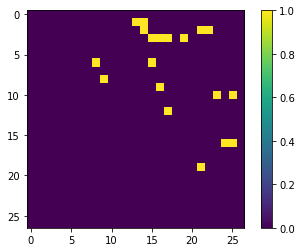

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(edge_mat)
plt.colorbar()
plt.show()

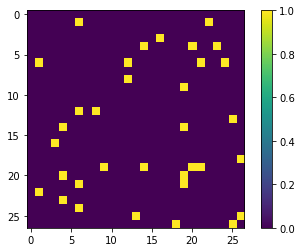

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(edge_index[5])
plt.colorbar()
plt.show()

In [ ]:
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################

import numpy as np
import matplotlib.pyplot as plt

f = open("/content/dataset_2.txt", 'r')
data = []
length = 0
for i in f:
  new = []
  new.append(i)
  data.append(new)

  # length of dataset
  length += 1

f.close()

# create dataset from data
dataset = []
for i in range(length):
  new = []
  for j in data[i][0].split(','):
    new.append(float(j))
  dataset.append(new)


# trim out label from dataset
# Ex Ey Ez
label = []
new = []
for line in dataset:
  tmp = []
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.reverse()
  label.append(tmp)

print("label.shape: ", np.array(label).shape)


# create edge_index
edge_mat = np.zeros(shape=(27,27))
edge_index = []

for e in range(len(dataset)):
  for i in range(0, 27):
    for j in range(i+1, 27):
      edge_mat[i][j] = dataset[e].pop(0)
  edge_index.append(edge_mat + edge_mat.T)


# whole dataset to Tensor & train/test split
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

edge_index = torch.FloatTensor(edge_index)
label = torch.FloatTensor(label)

split = int(length * 0.8)

x_train = edge_index[:split]
y_train = label[:split]
x_val = edge_index[split:]
y_val = label[split:]

print("x_train, y_train, x_val shape: ", x_train.shape, y_train.shape, x_val.shape)

# create torch dataset
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, label, dataset, transform=None, target_transform=None):
        self.labels = label
        self.dataset = dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        data = self.dataset[idx]
        label = self.labels[idx]
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

# create DataLoader
from torch.utils.data import DataLoader

training_data   = CustomDataset(label=y_train, dataset=x_train)
test_data       = CustomDataset(label=y_val, dataset=x_val)
train_loader    = DataLoader(training_data, batch_size=4, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=4, shuffle=False)

label.shape:  (2000, 3)
x_train, y_train, x_val shape:  torch.Size([1600, 27, 27]) torch.Size([1600, 3]) torch.Size([400, 27, 27])


In [ ]:
x, y = next(iter(train_loader))
print("tr: ", x.shape, y.shape)

x, y = next(iter(test_loader))
print("te: ", x.shape, y.shape, y[0])

NameError: ignored

In [ ]:
#x_train, val_x = torch.utils.data.random_split(dataset, [1400, 350])
#y_train, val_y = torch.utils.data.random_split(label, [1400, 350])

In [ ]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms

cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1  = nn.Linear(729, 256)
        self.fc2  = nn.Linear(256, 128)
        self.fc3  = nn.Linear(128, 64)
        self.fc4  = nn.Linear(64, 32)
        
        self.fc51  = nn.Linear(32, 10)
        self.fc52  = nn.Linear(32, 10)

        self.fc6  = nn.Linear(10, 32)
        self.fc7  = nn.Linear(32, 64)
        self.fc8  = nn.Linear(64, 128)
        self.fc9  = nn.Linear(128, 256)
        self.fc10  = nn.Linear(256, 729)

        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        torch.nn.init.xavier_uniform_(self.fc51.weight)
        torch.nn.init.xavier_uniform_(self.fc52.weight)
        torch.nn.init.xavier_uniform_(self.fc6.weight)
        torch.nn.init.xavier_uniform_(self.fc7.weight)
        torch.nn.init.xavier_uniform_(self.fc8.weight)
        torch.nn.init.xavier_uniform_(self.fc9.weight)
        torch.nn.init.xavier_uniform_(self.fc10.weight)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        h1 = F.relu(self.fc2(h1))
        h1 = F.relu(self.fc3(h1))
        h1 = F.relu(self.fc4(h1))
        return self.fc51(h1), self.fc52(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc6(z))
        h3 = F.relu(self.fc7(h3))
        h3 = F.relu(self.fc8(h3))
        h3 = F.relu(self.fc9(h3))
        return torch.sigmoid(self.fc10(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 729))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
VAE()

VAE(
  (fc1): Linear(in_features=729, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc51): Linear(in_features=32, out_features=10, bias=True)
  (fc52): Linear(in_features=32, out_features=10, bias=True)
  (fc6): Linear(in_features=10, out_features=32, bias=True)
  (fc7): Linear(in_features=32, out_features=64, bias=True)
  (fc8): Linear(in_features=64, out_features=128, bias=True)
  (fc9): Linear(in_features=128, out_features=256, bias=True)
  (fc10): Linear(in_features=256, out_features=729, bias=True)
)

In [ ]:
# the number of trainable parameter
sum(p.numel() for p in VAE().parameters() if p.requires_grad)

461933

In [ ]:
val_losses = []
train_losses = []

model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-6)


def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 729), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        data = data.float()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        train_losses.append(loss.item())
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))

d = []
r = []
def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            data = data.float()
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()

            val_losses.append(loss_function(recon_batch, data, mu, logvar).item())
            if i == 0:
                n = min(data.size(0), 1)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(4, 27, 27)[:n]])
                d.append(data)
                r.append(recon_batch)


    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

if __name__ == "__main__":
    for epoch in range(100):
        train(epoch)
        test(epoch)

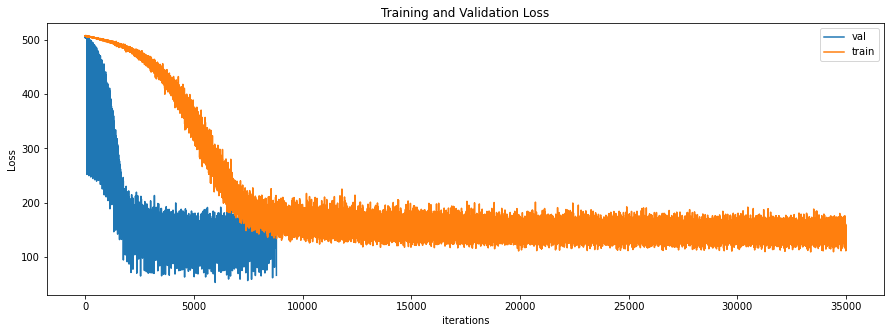

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(val_losses)/4,label="val")
plt.plot(np.array(train_losses)/4,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
np.array(train_losses) / 4

array([506.62463379, 506.29690552, 506.65631104, ..., 152.94316101,
       139.41781616, 130.01306152])

In [ ]:
test_loader     = DataLoader(training_data, batch_size=4, shuffle=True)

data, y = next(iter(test_loader))
recon_batch, mu, logvar = model(data.cuda())

In [ ]:
keepx = data
keepy = y

In [ ]:
data[0].shape, recon_batch.view(4, 27, 27)[0].shape

(torch.Size([27, 27]), torch.Size([27, 27]))

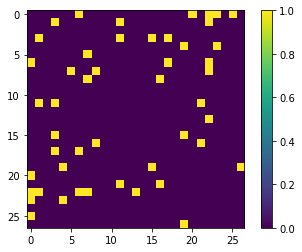

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(data[1])
plt.colorbar()
plt.show()

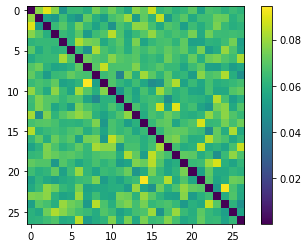

In [ ]:
recon_batch = recon_batch.cpu()
plt.imshow(recon_batch.view(4, 27, 27)[1].detach().numpy())
plt.colorbar()
plt.show()

In [ ]:
##########################################################################################
##########################################################################################
##########################################################################################
                                      ##### AE #####
##########################################################################################
##########################################################################################
##########################################################################################

In [ ]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.fc1  = nn.Linear(729, 512)
        self.fc2  = nn.Linear(512, 256)
        self.fc3  = nn.Linear(256, 128)
        self.fc4  = nn.Linear(128, 64)        
            
        self.fc5  = nn.Linear(64, 2)
        self.fc6  = nn.Linear(2, 64)

        self.fc7  = nn.Linear(64, 128)
        self.fc8  = nn.Linear(128, 256)
        self.fc9  = nn.Linear(256, 512)
        self.fc10  = nn.Linear(512, 729)

        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        torch.nn.init.xavier_uniform_(self.fc5.weight)
        torch.nn.init.xavier_uniform_(self.fc6.weight)
        torch.nn.init.xavier_uniform_(self.fc7.weight)
        torch.nn.init.xavier_uniform_(self.fc8.weight)
        torch.nn.init.xavier_uniform_(self.fc9.weight)
        torch.nn.init.xavier_uniform_(self.fc10.weight)
    
    def encode(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        return self.fc5(x)
    
    def decode(self, x):
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        
        return torch.sigmoid(self.fc10(x))

    def forward(self, x):
        z = self.encode(x.view(-1, 729))
        return self.decode(z)

ae = AE().cuda()
ae

AE(
  (fc1): Linear(in_features=729, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=2, bias=True)
  (fc6): Linear(in_features=2, out_features=64, bias=True)
  (fc7): Linear(in_features=64, out_features=128, bias=True)
  (fc8): Linear(in_features=128, out_features=256, bias=True)
  (fc9): Linear(in_features=256, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=729, bias=True)
)

In [ ]:
optimizer = optim.Adam(ae.parameters(), lr=1e-4)

def loss_function(recon_x, x):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 729), reduction='sum')
    return BCE

In [ ]:
train_losses = []
val_losses = []

def train(epoch):
    ae.train()
    train_loss = 0
    for batch_idx, (x, y) in enumerate(train_loader):
        x, y = x.cuda(), y.cuda()

        optimizer.zero_grad()
        recon = ae(x)
        loss = loss_function(recon, x)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_losses.append(loss.item())

        if batch_idx % 10  == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(x), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(x)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

def test():
    ae.eval()
    test_loss= 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.cuda(), y.cuda()
            
            recon = ae(x)
            loss = loss_function(recon, x)

            test_loss += loss.item()
            val_losses.append(loss_function(recon, x).item())
        
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


In [ ]:
# train
for epoch in range(0, 100):
    train(epoch)
    test()

RuntimeError: ignored

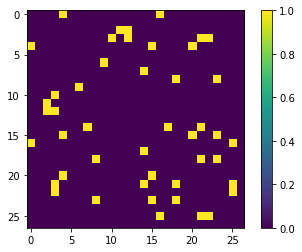

In [ ]:
x, _ = next(iter(test_loader))
r = ae(x.cuda())

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x[0])
plt.colorbar()
plt.show()


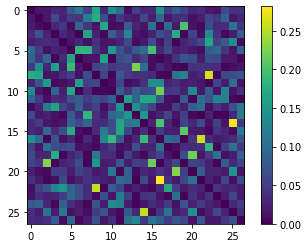

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(r.view(4, 27, 27)[0].cpu().detach().numpy())
plt.colorbar()
plt.show()

In [ ]:
##########################################################################################
##########################################################################################
##########################################################################################
######################################CVAE################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CVAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim, c_dim):
        super(CVAE, self).__init__()
        
        # encoder part
        self.fc1 = nn.Linear(x_dim + c_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc51 = nn.Linear(64, z_dim)
        self.fc52 = nn.Linear(64, z_dim)
        # decoder part
        self.fc6 = nn.Linear(z_dim + c_dim, 64)
        self.fc7 = nn.Linear(64, 128)
        self.fc8 = nn.Linear(128, 256)
        self.fc9 = nn.Linear(256, 512)
        self.fc10 = nn.Linear(512, x_dim)
    

        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        torch.nn.init.xavier_uniform_(self.fc51.weight)
        torch.nn.init.xavier_uniform_(self.fc52.weight)
        torch.nn.init.xavier_uniform_(self.fc6.weight)
        torch.nn.init.xavier_uniform_(self.fc7.weight)
        torch.nn.init.xavier_uniform_(self.fc8.weight)
        torch.nn.init.xavier_uniform_(self.fc9.weight)
        torch.nn.init.xavier_uniform_(self.fc10.weight)

    def encoder(self, x, c):
        concat_input = torch.cat([x, c], 1)
        h = F.relu(self.fc1(concat_input))
        h = F.relu(self.fc2(h))
        h = F.relu(self.fc3(h))
        h = F.relu(self.fc4(h))
        return self.fc51(h), self.fc52(h)
    
    def sampling(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add(mu) # return z sample
    
    def decoder(self, z, c):
        concat_input = torch.cat([z, c], 1)
        h = F.relu(self.fc6(concat_input))
        h = F.relu(self.fc7(h))
        h = F.relu(self.fc8(h))
        h = F.relu(self.fc9(h))
        return torch.sigmoid(self.fc10(h))
    
    def forward(self, x, c):
        mu, log_var = self.encoder(x.view(-1, 729), c)
        z = self.sampling(mu, log_var)
        return self.decoder(z, c), mu, log_var

# build model
cond_dim = 3
cvae = CVAE(x_dim=729, h_dim1=512, h_dim2=256, z_dim=10, c_dim=cond_dim)
if torch.cuda.is_available():
    cvae.cuda()
cvae

CVAE(
  (fc1): Linear(in_features=732, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc51): Linear(in_features=64, out_features=10, bias=True)
  (fc52): Linear(in_features=64, out_features=10, bias=True)
  (fc6): Linear(in_features=13, out_features=64, bias=True)
  (fc7): Linear(in_features=64, out_features=128, bias=True)
  (fc8): Linear(in_features=128, out_features=256, bias=True)
  (fc9): Linear(in_features=256, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=729, bias=True)
)

In [ ]:
optimizer = optim.Adam(cvae.parameters(), lr=1e-5)
# return reconstruction error + KL divergence losses
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 729), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

In [ ]:
train_loader    = DataLoader(training_data, batch_size=4, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=4, shuffle=False)

In [ ]:
train_losses = []
val_losses = []

def train(epoch):
    cvae.train()
    train_loss = 0
    for batch_idx, (data, cond) in enumerate(train_loader):
        #print(cond[0])
        data, cond = data.cuda(), cond.cuda()#F.one_hot(cond[0].long(), num_classes=3)
        data = data.float()

        optimizer.zero_grad()
        recon_batch, mu, log_var = cvae(data, cond)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        train_losses.append(loss.item())

        if batch_idx % 10  == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

def test():
    cvae.eval()
    test_loss= 0
    with torch.no_grad():
        for data, cond in test_loader:
            data, cond = data.cuda(), cond.cuda()
            data = data.float()
            
            recon, mu, log_var = cvae(data, cond)
            # sum up batch loss
            test_loss += loss_function(recon, data, mu, log_var).item()
            
            val_losses.append(loss_function(recon, data, mu, log_var).item())
        
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


In [ ]:
# train
for epoch in range(0, 100):
    train(epoch)
    test()

Train Epoch: 0 [0/1400 (0%)]	Loss: 519.615479
Train Epoch: 0 [40/1400 (3%)]	Loss: 521.170288
Train Epoch: 0 [80/1400 (6%)]	Loss: 517.401672
Train Epoch: 0 [120/1400 (9%)]	Loss: 513.259399
Train Epoch: 0 [160/1400 (11%)]	Loss: 508.790833
Train Epoch: 0 [200/1400 (14%)]	Loss: 499.673737
Train Epoch: 0 [240/1400 (17%)]	Loss: 507.425903
Train Epoch: 0 [280/1400 (20%)]	Loss: 496.188385
Train Epoch: 0 [320/1400 (23%)]	Loss: 488.579681
Train Epoch: 0 [360/1400 (26%)]	Loss: 485.035400
Train Epoch: 0 [400/1400 (29%)]	Loss: 479.876556
Train Epoch: 0 [440/1400 (31%)]	Loss: 468.217346
Train Epoch: 0 [480/1400 (34%)]	Loss: 464.519470
Train Epoch: 0 [520/1400 (37%)]	Loss: 452.675903
Train Epoch: 0 [560/1400 (40%)]	Loss: 470.287872
Train Epoch: 0 [600/1400 (43%)]	Loss: 452.590271
Train Epoch: 0 [640/1400 (46%)]	Loss: 443.306305
Train Epoch: 0 [680/1400 (49%)]	Loss: 446.575378
Train Epoch: 0 [720/1400 (51%)]	Loss: 441.921478
Train Epoch: 0 [760/1400 (54%)]	Loss: 417.456512
Train Epoch: 0 [800/1400 (57

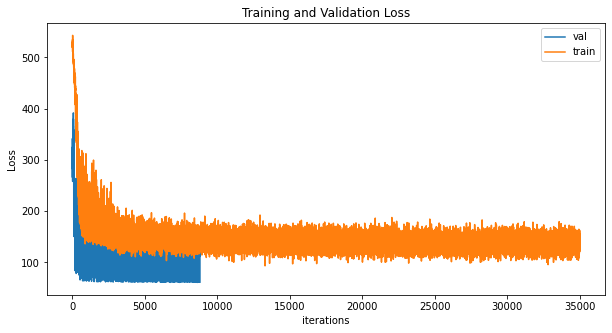

In [ ]:
import matplotlib.pyplot as plt
# training loop


# testing

plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(val_losses) / 4 ,label="val")
plt.plot(np.array(train_losses) / 4, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()

In [ ]:
train_loader    = DataLoader(training_data, batch_size=1, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=1, shuffle=False)

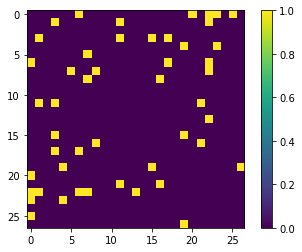

In [ ]:
#data, y = next(iter(test_loader))
recon_batch, mu, logvar = cvae(keepx.cuda(), keepy.cuda())

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(keepx[1])
plt.colorbar()
plt.show()

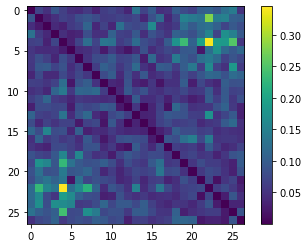

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(recon_batch.view(4, 27, 27)[1].cpu().detach().numpy())
plt.colorbar()
plt.show()

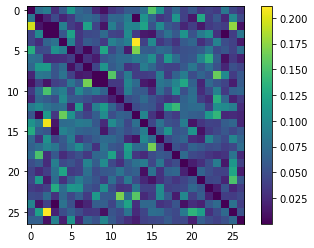

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = []
c = y.clone().detach() #[[12.691395, 8.735944, 8.666785]]

with torch.no_grad():
    sample = torch.randn(1, 10)
    sample = cvae.decoder(sample, c)
    sample = sample.view(1, 27, 27)[0]
    a = sample

    plt.imshow(sample)
    plt.colorbar()
    plt.show()


In [ ]:






#Prediction by ML, FCN, CNN





In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from torch.nn import functional as F
from sklearn import metrics

In [ ]:
# flatten the matrix
edge_flat = np.array(edge_index)
edge_flat = edge_flat.reshape(1750, -1)

# split
x_train, x_test, y_train, y_test = train_test_split(edge_flat, label, test_size=0.15, shuffle=False)

In [ ]:
reg = MultiOutputRegressor(GradientBoostingRegressor(), n_jobs=-1)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))

pred = reg.predict(x_test)

F.l1_loss(torch.tensor(pred),y_test)

0.6387636684688572


tensor(3.9041, dtype=torch.float64)

In [ ]:
torch.sqrt(F.mse_loss(torch.tensor(pred),y_test))

tensor(5.0929, dtype=torch.float64)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(729, 512)
        self.fc2 = nn.Linear(512, 230)
        self.fc3 = nn.Linear(230, 182)
        self.fc4 = nn.Linear(182, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 9)
        self.fc8 = nn.Linear(9, 3)
        


        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)
        nn.init.xavier_uniform_(self.fc5.weight)
        nn.init.xavier_uniform_(self.fc6.weight)
        nn.init.xavier_uniform_(self.fc7.weight)
        nn.init.xavier_uniform_(self.fc8.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 729))
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.leaky_relu(x)
        x = self.fc6(x)
        x = F.leaky_relu(x)
        x = self.fc7(x)
        x = F.leaky_relu(x)
        
        
        return self.fc8(x)


model = DNN().cuda()
print(model)

DNN(
  (fc1): Linear(in_features=729, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=230, bias=True)
  (fc3): Linear(in_features=230, out_features=182, bias=True)
  (fc4): Linear(in_features=182, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=32, bias=True)
  (fc7): Linear(in_features=32, out_features=9, bias=True)
  (fc8): Linear(in_features=9, out_features=3, bias=True)
)


In [ ]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
epochs = 100

In [ ]:
x, y = next(iter(train_loader))
x, y = x.cuda(), y.cuda()

o = model(x)
loss=loss_function(o, y)
print(x.shape, o.shape, loss.shape, y.shape)

torch.Size([4, 27, 27]) torch.Size([4, 3]) torch.Size([]) torch.Size([4, 3])


In [ ]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [ ]:
def train(model, train_losses, epoch):
    model.train()
    train_loss = 0
    for x, y in train_loader:
        x, y = x.cuda().float(), y.cuda()
        optimizer.zero_grad()
        o = model(x)
        loss = loss_function(o, y)
        
        writer.add_scalar("Loss/train", loss, epoch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    print('====> Epoch: {} loss: {:.4f}'.format(e, train_loss / len(train_loader)))
    train_losses.append(train_loss / len(train_loader))

def test(model, val_losses):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.cuda().float(), y.cuda()       
            o = model(x)
            loss = loss_function(o, y)
            
            test_loss += loss.item()
    print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))
    val_losses.append(test_loss / len(test_loader))

In [ ]:
# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

In [ ]:
x, y = next(iter(test_loader))
o    = model(x.cuda())
print("mae: ", F.l1_loss(o, y.cuda()))
print(y[:], "\n", o[:])

mae:  tensor(2.9072, device='cuda:0', grad_fn=<L1LossBackward>)
tensor([[20.4802, 13.7561,  9.1044],
        [12.0543,  0.6352,  7.2949],
        [12.8651, 11.9096,  8.6483],
        [14.9428,  6.6858,  3.0543]]) 
 tensor([[16.0255, 11.5789, 10.6445],
        [12.1432,  5.3963, 10.7889],
        [ 5.8671, 13.1397,  8.5982],
        [19.0985, 10.6055,  5.0710]], device='cuda:0', grad_fn=<SliceBackward>)


In [ ]:
#writer.flush()
#writer.close()
#!pip install torch torchvision
#!pip install tensorboard
#!pip install tensorboard --upgrade
#!tensorboard --logdir=runs

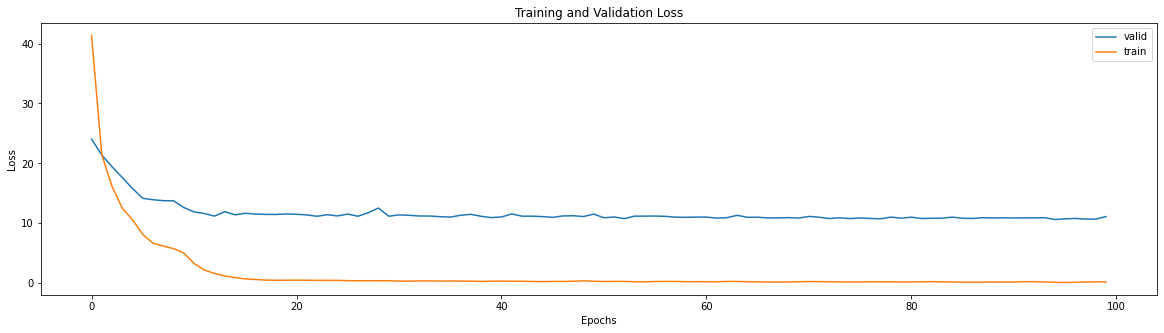

In [ ]:
import matplotlib.pyplot as plt
# training loop


# testing

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss), label="valid")
plt.plot(np.array(tloss), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:


### CNN on Adjaceny matrix



In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn
from torch.autograd import Variable
import torch.backends.cudnn as cudnn

use_cuda = torch.cuda.is_available()
use_cuda

True

In [ ]:
class E2EBlock(torch.nn.Module):
    def __init__(self, in_dim, out_dim, bias=False):
        super(E2EBlock, self).__init__()
        self.cnn1 = torch.nn.Conv2d(in_dim, out_dim, (1, 27), bias=bias)
        self.cnn2 = torch.nn.Conv2d(in_dim, out_dim, (27, 1), bias=bias)

        nn.init.xavier_uniform_(self.cnn1.weight)
        nn.init.xavier_uniform_(self.cnn2.weight)

    def forward(self, x):
        a = self.cnn1(x)
        b = self.cnn2(x)
        return torch.cat([a]*27, 3) + torch.cat([b]*27, 2)

class BrainNetCNN(torch.nn.Module):
    def __init__(self):
        super(BrainNetCNN, self).__init__()
        
        self.e2econv1 = E2EBlock(1, 16, bias=True)
        self.conv1_bn = nn.BatchNorm2d(16)
        self.e2econv2 = E2EBlock(16, 32, bias=True)
        self.conv2_bn = nn.BatchNorm2d(32)
        self.e2econv3 = E2EBlock(32, 64, bias=True)
        self.conv3_bn = nn.BatchNorm2d(64)
        self.e2econv4 = E2EBlock(64, 128, bias=True)
        self.conv4_bn = nn.BatchNorm2d(128)
        self.e2econv5 = E2EBlock(128, 256, bias=True)
        self.conv5_bn = nn.BatchNorm2d(256)

        self.E2N = torch.nn.Conv2d(256, 64, (1, 27))
        self.N2G = torch.nn.Conv2d(64, 729, (27, 1))

        self.dense1 = torch.nn.Linear(729, 512)
        self.dense1_bn = nn.BatchNorm1d(512)
        self.dense2 = torch.nn.Linear(512, 256)
        self.dense2_bn = nn.BatchNorm1d(256)
        self.dense3 = torch.nn.Linear(256, 64)
        self.dense3_bn = nn.BatchNorm1d(64)
        self.dense4 = torch.nn.Linear(64, 16)
        self.dense4_bn = nn.BatchNorm1d(16)
        self.dense5 = torch.nn.Linear(16, 3)
        

        nn.init.xavier_uniform_(self.E2N.weight)
        nn.init.xavier_uniform_(self.N2G.weight)
        nn.init.xavier_uniform_(self.dense1.weight)
        nn.init.xavier_uniform_(self.dense2.weight)
        nn.init.xavier_uniform_(self.dense3.weight)   
        nn.init.xavier_uniform_(self.dense4.weight)
        nn.init.xavier_uniform_(self.dense5.weight)

    def forward(self, x):
        x = x.unsqueeze(1)
        out = F.relu(self.e2econv1(x))
        out = self.conv1_bn(out)
        out = F.relu(self.e2econv2(out))
        out = self.conv2_bn(out)
        out = F.relu(self.e2econv3(out))
        out = self.conv3_bn(out)
        out = F.relu(self.e2econv4(out))
        out = self.conv4_bn(out)
        out = F.relu(self.e2econv5(out))
        out = self.conv5_bn(out)
        #out = F.max_pool2d(out, 2)  # 적용한 마지막 output kernel size, kernel 영향 + 풀링 영향으로 줄어든 사이즈

        out = F.relu(self.E2N(out))
        out = F.relu(self.N2G(out))

        out = out.view(out.size(0), -1)
        out = F.relu(self.dense1(out))
        out = self.dense1_bn(out)
        out = F.relu(self.dense2(out))
        out = self.dense2_bn(out)
        out = F.relu(self.dense3(out))
        out = self.dense3_bn(out)
        out = F.relu(self.dense4(out))
        out = self.dense4_bn(out)

        return self.dense5(out)

model = BrainNetCNN().cuda()
model

BrainNetCNN(
  (e2econv1): E2EBlock(
    (cnn1): Conv2d(1, 16, kernel_size=(1, 27), stride=(1, 1))
    (cnn2): Conv2d(1, 16, kernel_size=(27, 1), stride=(1, 1))
  )
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (e2econv2): E2EBlock(
    (cnn1): Conv2d(16, 32, kernel_size=(1, 27), stride=(1, 1))
    (cnn2): Conv2d(16, 32, kernel_size=(27, 1), stride=(1, 1))
  )
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (e2econv3): E2EBlock(
    (cnn1): Conv2d(32, 64, kernel_size=(1, 27), stride=(1, 1))
    (cnn2): Conv2d(32, 64, kernel_size=(27, 1), stride=(1, 1))
  )
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (e2econv4): E2EBlock(
    (cnn1): Conv2d(64, 128, kernel_size=(1, 27), stride=(1, 1))
    (cnn2): Conv2d(64, 128, kernel_size=(27, 1), stride=(1, 1))
  )
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
epochs = 100

In [ ]:
def train(model, train_losses, epoch):
    model.train()
    train_loss = 0
    for x, y in train_loader:
        x, y = x.cuda().float(), y.cuda()
        optimizer.zero_grad()
        o = model(x)
        loss = loss_function(o, y)
        
        #writer.add_scalar("Loss/train", loss, epoch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    print('====> Epoch: {} loss: {:.4f}'.format(e, train_loss / len(train_loader)))
    train_losses.append(train_loss / len(train_loader))

def test(model, val_losses):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.cuda().float(), y.cuda()       
            o = model(x)
            loss = loss_function(o, y)
            
            test_loss += loss.item()
    print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))
    val_losses.append(test_loss / len(test_loader))

In [ ]:
# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

====> Epoch: 1 loss: 122.6827
====> Test set loss: 104.0986
====> Epoch: 2 loss: 118.2249
====> Test set loss: 111.0464
====> Epoch: 3 loss: 113.9889
====> Test set loss: 114.8996
====> Epoch: 4 loss: 108.9469
====> Test set loss: 105.1876
====> Epoch: 5 loss: 103.3735
====> Test set loss: 100.0688
====> Epoch: 6 loss: 98.7228
====> Test set loss: 96.6087
====> Epoch: 7 loss: 92.6836
====> Test set loss: 92.1360
====> Epoch: 8 loss: 88.7487
====> Test set loss: 78.5460
====> Epoch: 9 loss: 82.6384
====> Test set loss: 73.0160
====> Epoch: 10 loss: 76.5772
====> Test set loss: 72.2264
====> Epoch: 11 loss: 70.4618
====> Test set loss: 62.9362
====> Epoch: 12 loss: 64.5120
====> Test set loss: 122.4833
====> Epoch: 13 loss: 58.4345
====> Test set loss: 59.5637
====> Epoch: 14 loss: 51.3506
====> Test set loss: 48.4533
====> Epoch: 15 loss: 46.9381
====> Test set loss: 42.0679
====> Epoch: 16 loss: 42.9921
====> Test set loss: 39.7580
====> Epoch: 17 loss: 39.4568
====> Test set loss: 35.

In [ ]:
x, y = next(iter(test_loader))
o    = model(x.cuda())
print("mae: ", F.l1_loss(o, y.cuda()))
print(y[:], "\n", o[:])

mae:  tensor(3.8366, device='cuda:0', grad_fn=<L1LossBackward>)
tensor([[20.4802, 13.7561,  9.1044],
        [12.0543,  0.6352,  7.2949],
        [12.8651, 11.9096,  8.6483],
        [14.9428,  6.6858,  3.0543]]) 
 tensor([[11.6477, 10.4337, 10.2797],
        [ 6.2220,  5.2064,  9.6002],
        [ 9.3058,  8.8468,  6.7479],
        [ 9.2598,  8.2150,  7.3201]], device='cuda:0', grad_fn=<SliceBackward>)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss), label="valid")
plt.plot(np.array(tloss), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:



### CNN




In [ ]:
train_loader    = DataLoader(training_data, batch_size=1, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=1, shuffle=True)

In [ ]:
x, y = next(iter(train_loader))
x.shape

torch.Size([1, 27, 27])

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 50
batch_idx = 1

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1)

        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(32*12*12, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)

        torch.nn.init.xavier_uniform_(self.conv1.weight)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        

    def forward(self, x):
        x = x.unsqueeze(1)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        
       # x = F.relu(self.conv2(x))
        #x = F.max_pool2d(x, 2)
        #x = self.dropout1(x)
        
        
        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        
        return x


model = CNN().cuda()
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4608, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)


In [ ]:
def test(net):
    net.eval()
    test_loss= 0
    with torch.no_grad():
        for data, y in test_loader:
            data, y = data.cuda(), y.cuda()
            
            output = net(data.float())
            loss = criterion(output, y)
            test_loss += loss.item()
            
            #val_losses.append(loss_function(recon, data, mu, log_var).item())
    print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader.dataset)))


# Train
for e in range(epochs):
    model.train()
    train_loss = 0
    for data, y in train_loader:
        data, y = data.cuda(), y.cuda()

        optimizer.zero_grad()   
        output = model(data.float())
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        #if batch_idx % 10  == 0:
        #print('Loss: {:.6f}'.format(loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(e, train_loss / len(train_loader.dataset)))

    test(model)

torch.Size([4, 27, 27])
torch.Size([4, 1, 27, 27])
torch.Size([4, 32, 25, 25])
torch.Size([4, 32, 12, 12])
torch.Size([4, 32, 12, 12])
torch.Size([4, 4608])
torch.Size([4, 27, 27])
torch.Size([4, 1, 27, 27])
torch.Size([4, 32, 25, 25])
torch.Size([4, 32, 12, 12])
torch.Size([4, 32, 12, 12])
torch.Size([4, 4608])
torch.Size([4, 27, 27])
torch.Size([4, 1, 27, 27])
torch.Size([4, 32, 25, 25])
torch.Size([4, 32, 12, 12])
torch.Size([4, 32, 12, 12])
torch.Size([4, 4608])
torch.Size([4, 27, 27])
torch.Size([4, 1, 27, 27])
torch.Size([4, 32, 25, 25])
torch.Size([4, 32, 12, 12])
torch.Size([4, 32, 12, 12])
torch.Size([4, 4608])
torch.Size([4, 27, 27])
torch.Size([4, 1, 27, 27])
torch.Size([4, 32, 25, 25])
torch.Size([4, 32, 12, 12])
torch.Size([4, 32, 12, 12])
torch.Size([4, 4608])
torch.Size([4, 27, 27])
torch.Size([4, 1, 27, 27])
torch.Size([4, 32, 25, 25])
torch.Size([4, 32, 12, 12])
torch.Size([4, 32, 12, 12])
torch.Size([4, 4608])
torch.Size([4, 27, 27])
torch.Size([4, 1, 27, 27])
torch.S

KeyboardInterrupt: ignored

In [ ]:



# VAE + latent space optimization




In [ ]:
train_loader    = DataLoader(training_data, batch_size=4, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=4, shuffle=False)

In [ ]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1  = nn.Linear(729, 512)
        self.fc2  = nn.Linear(512, 256)
        self.fc3  = nn.Linear(256, 128)
        self.fc4  = nn.Linear(128, 64)
        
        self.fc51  = nn.Linear(64, 5)
        self.fc52  = nn.Linear(64, 5)

        self.fc6  = nn.Linear(5, 64)
        self.fc7  = nn.Linear(64, 128)
        self.fc8  = nn.Linear(128, 256)
        self.fc9  = nn.Linear(256, 512)
        self.fc10  = nn.Linear(512, 729)

        self.side_fc1 = nn.Linear(5, 16)
        self.side_fc2 = nn.Linear(16, 32)
        self.side_fc3 = nn.Linear(32, 32)
        self.side_fc4 = nn.Linear(32, 16)
        self.side_fc5 = nn.Linear(16, 8)
        self.side_fc6 = nn.Linear(8, 3)

        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        torch.nn.init.xavier_uniform_(self.fc51.weight)
        torch.nn.init.xavier_uniform_(self.fc52.weight)
        torch.nn.init.xavier_uniform_(self.fc6.weight)
        torch.nn.init.xavier_uniform_(self.fc7.weight)
        torch.nn.init.xavier_uniform_(self.fc8.weight)
        torch.nn.init.xavier_uniform_(self.fc9.weight)
        torch.nn.init.xavier_uniform_(self.fc10.weight)
        torch.nn.init.xavier_uniform_(self.side_fc1.weight)
        torch.nn.init.xavier_uniform_(self.side_fc2.weight)
        torch.nn.init.xavier_uniform_(self.side_fc3.weight)


    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        h1 = F.relu(self.fc2(h1))
        h1 = F.relu(self.fc3(h1))
        h1 = F.relu(self.fc4(h1))
        return self.fc51(h1), self.fc52(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc6(z))
        h3 = F.relu(self.fc7(h3))
        h3 = F.relu(self.fc8(h3))
        h3 = F.relu(self.fc9(h3))
        return torch.sigmoid(self.fc10(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 729))

        x = F.relu(self.side_fc1(mu))
        x = F.relu(self.side_fc2(x))
        x = F.relu(self.side_fc3(x))
        x = F.relu(self.side_fc4(x))
        x = F.relu(self.side_fc5(x))
        pred = self.side_fc6(x)

        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar, pred


val_losses = []
train_losses = []

model = VAE().cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-5)
epochs = 100

In [ ]:
model

VAE(
  (fc1): Linear(in_features=729, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc51): Linear(in_features=64, out_features=5, bias=True)
  (fc52): Linear(in_features=64, out_features=5, bias=True)
  (fc6): Linear(in_features=5, out_features=64, bias=True)
  (fc7): Linear(in_features=64, out_features=128, bias=True)
  (fc8): Linear(in_features=128, out_features=256, bias=True)
  (fc9): Linear(in_features=256, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=729, bias=True)
  (side_fc1): Linear(in_features=5, out_features=16, bias=True)
  (side_fc2): Linear(in_features=16, out_features=32, bias=True)
  (side_fc3): Linear(in_features=32, out_features=32, bias=True)
  (side_fc4): Linear(in_features=32, out_features=16, bias=True)
  (side_fc5): Linear(in_features=16, out_features=8, bias=True

In [ ]:
train_losses = []
val_losses = []

# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 729), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, y) in enumerate(train_loader):
        data, y = data.cuda(), y.cuda()
        
        optimizer.zero_grad()
        recon_batch, mu, logvar, pred = model(data)
        loss = loss_function(recon_batch, data, mu, logvar) + F.mse_loss(pred, y)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        train_losses.append(loss.item())
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))

d = []
r = []
def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, y) in enumerate(test_loader):
            data, y = data.cuda(), y.cuda()

            recon_batch, mu, logvar, pred = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item() + F.mse_loss(pred, y).item()

            val_losses.append(loss_function(recon_batch, data, mu, logvar).item())
            if i == 0:
                n = min(data.size(0), 1)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(4, 27, 27)[:n]])
                d.append(data)
                r.append(recon_batch)

                #save_image(comparison.cpu(),
                #         'results/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

if __name__ == "__main__":
    for epoch in range(1, epochs + 1):
        train(epoch)
        test(epoch)

Train Epoch: 1 [0/1400 (0%)]	Loss: 517.777649
Train Epoch: 1 [40/1400 (3%)]	Loss: 532.662292
Train Epoch: 1 [80/1400 (6%)]	Loss: 543.317200
Train Epoch: 1 [120/1400 (9%)]	Loss: 514.298584
Train Epoch: 1 [160/1400 (11%)]	Loss: 518.490356
Train Epoch: 1 [200/1400 (14%)]	Loss: 518.435059
Train Epoch: 1 [240/1400 (17%)]	Loss: 552.592407
Train Epoch: 1 [280/1400 (20%)]	Loss: 525.216064
Train Epoch: 1 [320/1400 (23%)]	Loss: 510.213928
Train Epoch: 1 [360/1400 (26%)]	Loss: 559.365479
Train Epoch: 1 [400/1400 (29%)]	Loss: 522.075012
Train Epoch: 1 [440/1400 (31%)]	Loss: 540.719177
Train Epoch: 1 [480/1400 (34%)]	Loss: 507.727173
Train Epoch: 1 [520/1400 (37%)]	Loss: 508.146729
Train Epoch: 1 [560/1400 (40%)]	Loss: 525.140198
Train Epoch: 1 [600/1400 (43%)]	Loss: 517.356995
Train Epoch: 1 [640/1400 (46%)]	Loss: 535.984497
Train Epoch: 1 [680/1400 (49%)]	Loss: 526.020264
Train Epoch: 1 [720/1400 (51%)]	Loss: 502.527557
Train Epoch: 1 [760/1400 (54%)]	Loss: 513.635803
Train Epoch: 1 [800/1400 (57

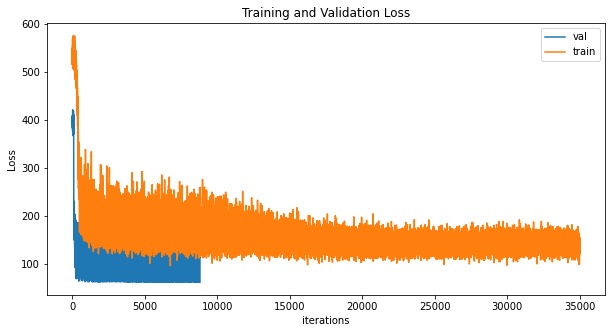

In [ ]:
import matplotlib.pyplot as plt
# training loop


# testing

plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(val_losses) / 4, label="val")
plt.plot(np.array(train_losses) / 4, label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()

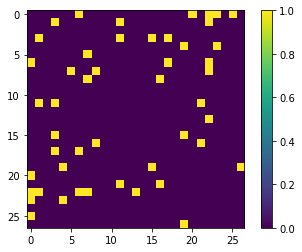

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#data, y = next(iter(test_loader))
#data, y = data.cuda(), y.cuda()

recon_batch, mu, logvar, pred = model(keepx.cuda())

plt.imshow(keepx[1])
plt.colorbar()
plt.show()

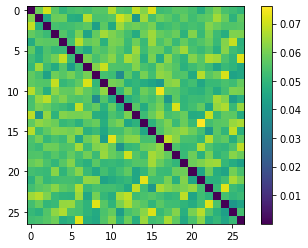

In [ ]:
plt.imshow(recon_batch.view(4, 27, 27)[1].cpu().detach().numpy())
plt.colorbar()
plt.show()

In [ ]:
y[0], pred[0]

(tensor([12.0543,  0.6352,  7.2949], device='cuda:0'),
 tensor([8.6152, 8.7800, 8.7319], device='cuda:0', grad_fn=<SelectBackward>))

In [ ]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric